In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import numpy as np

from IPython.display import display_markdown

import cleaning
import reinstancing

# Pruning and Resampling

In [2]:
rawData, users = cleaning.loadData("./Data/dataset_mood_smartphone.csv")
timeCorrected = cleaning.remove_useTimeOutliers(rawData)
dailyData  = cleaning.resample_daily(rawData, users)
prunedDaily= cleaning.pruneDays(dailyData,  users, method="allmood", baseFrame=rawData)

In [ ]:
a = prunedDaily.loc["AS14.15"]
b = dailyData.loc["AS14.15"]

In [ ]:
reinstancing.reinstanceDataset(rawData, users)

AS14.01
1 days 00:00:00
44 days 00:00:00
AS14.02
40 days 00:00:00
AS14.03
45 days 00:00:00
0 days 00:00:00
AS14.05
52 days 00:00:00
AS14.06
42 days 00:00:00
1 days 00:00:00
AS14.07
47 days 00:00:00
AS14.08
61 days 00:00:00
AS14.09
45 days 00:00:00
AS14.12
0 days 00:00:00
39 days 00:00:00
AS14.13
52 days 00:00:00
AS14.14
23 days 00:00:00
13 days 00:00:00
5 days 00:00:00
AS14.15
52 days 00:00:00
1 days 00:00:00
AS14.16
50 days 00:00:00
1 days 00:00:00
AS14.17
10 days 00:00:00
43 days 00:00:00
0 days 00:00:00
AS14.19
45 days 00:00:00
AS14.20
46 days 00:00:00
AS14.23
22 days 00:00:00
15 days 00:00:00
AS14.24
21 days 00:00:00
32 days 00:00:00
AS14.25
27 days 00:00:00
1 days 00:00:00
AS14.26
43 days 00:00:00
23 days 00:00:00
AS14.27
32 days 00:00:00
8 days 00:00:00
AS14.28
35 days 00:00:00
1 days 00:00:00
AS14.29
29 days 00:00:00
2 days 00:00:00
8 days 00:00:00
AS14.30
46 days 00:00:00
AS14.31
33 days 00:00:00
8 days 00:00:00
AS14.32
17 days 00:00:00
0 days 00:00:00
2 days 00:00:00
8 days 00

In [4]:
hourlyData = cleaning.resample_hourly(timeCorrected, users)
prunedHourly = cleaning.pruneDays(hourlyData, users, "allmood", rawData)

KeyboardInterrupt: 

In [ ]:
dates = cleaning.find_measuredDays(hourlyData, users)
sleepCorrected = cleaning.correct_sleepShutdown(hourlyData)

dailySleep = cleaning.resample_daily(sleepCorrected, users)
prunedSleep = cleaning.pruneDays_allMood(dailySleep, users, dates)

nums = pd.concat([sleepCorrected.loc[user].resample("1d").count() for user in users], keys=users)
nums = cleaning.pruneDays_allMood(nums, users, dates)

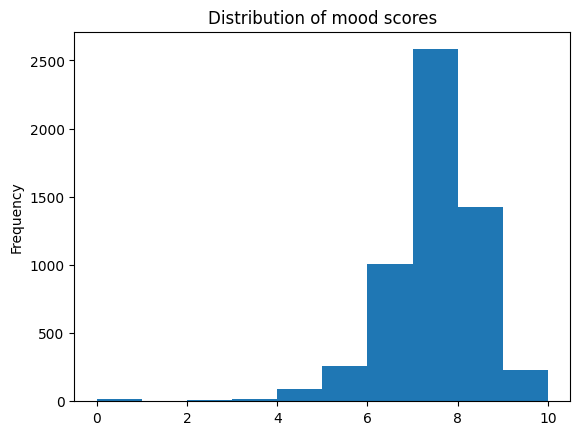

In [ ]:
_= rawData["mood"].plot.hist(title="Distribution of mood scores")

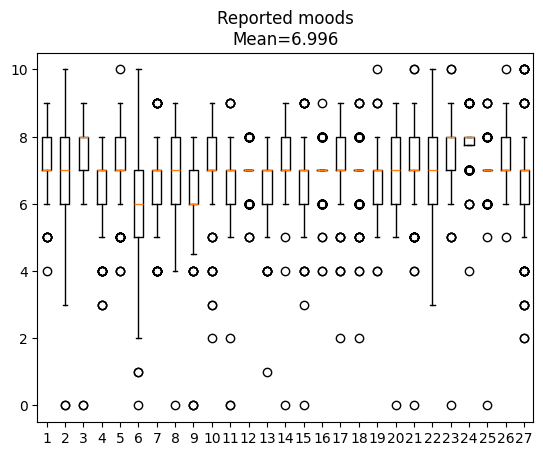

In [ ]:
fig, ax0 = plt.subplots()
uIds = [user for user in users]

_ = ax0.boxplot([rawData.loc[user]["mood"].loc[rawData.loc[user]["mood"].notna()] for user in users])
_= ax0.set_title(f"Reported moods\nMean={prunedHourly["mood"].mean():.3f}")

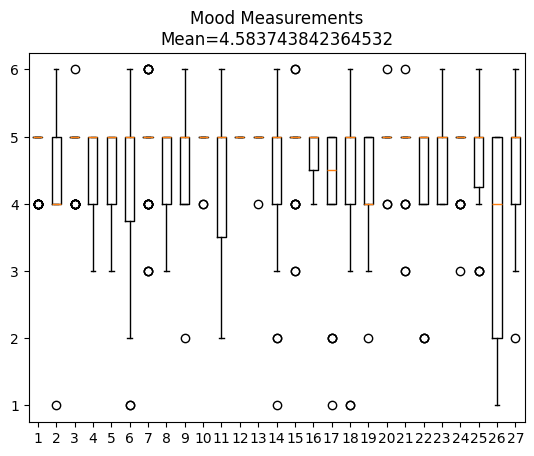

In [ ]:
Daily_measurements = pd.concat([rawData.loc[user].resample("1d").count() for user in users], keys=users)
Daily_measurements  = cleaning.pruneDays(Daily_measurements, users, baseFrame=rawData)

fig, ax1 = plt.subplots()
uIds = [user for user in users]

_ = ax1.boxplot([Daily_measurements.loc[user]["mood"] for user in users])
_= ax1.set_title(f"Mood Measurements\nMean={Daily_measurements["mood"].mean()}")


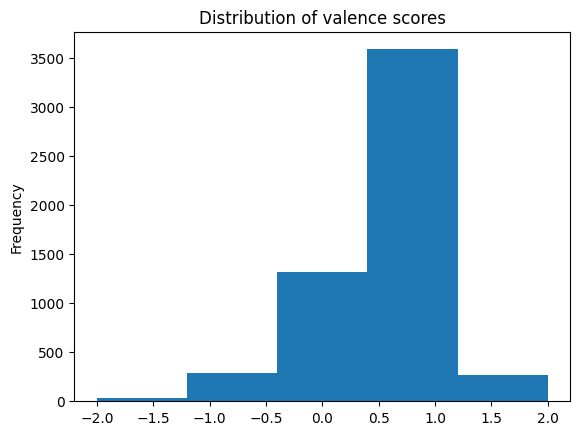

In [ ]:
_= rawData["circumplex.valence"].plot.hist(bins = 5, title="Distribution of valence scores")

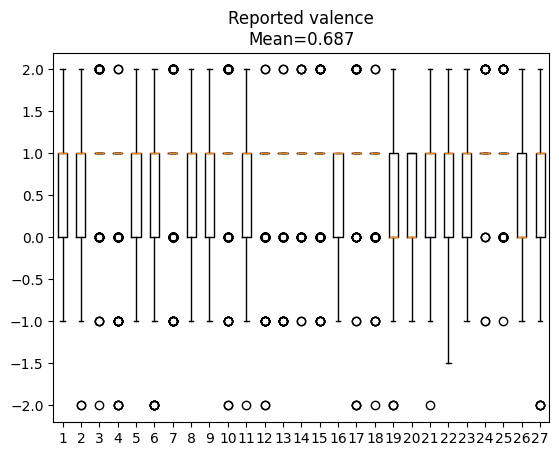

In [ ]:
fig, ax0 = plt.subplots()
uIds = [user for user in users]
stat = "circumplex.valence"
_ = ax0.boxplot([rawData.loc[user][stat].loc[rawData.loc[user][stat].notna()] for user in users])
_= ax0.set_title(f"Reported valence\nMean={rawData[stat].mean():.3f}")

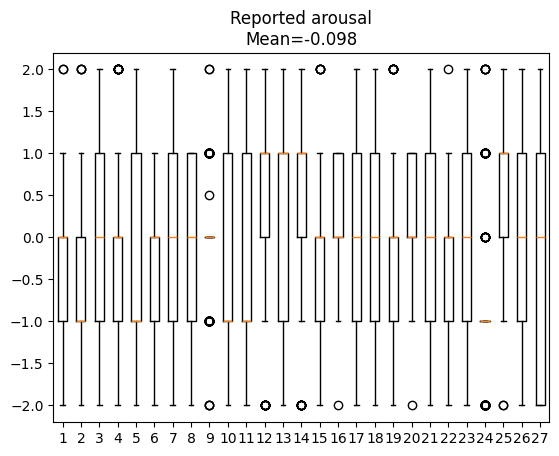

In [ ]:
fig, ax0 = plt.subplots()
uIds = [user for user in users]

stat = "circumplex.arousal"
_ = ax0.boxplot([rawData.loc[user][stat].loc[rawData.loc[user][stat].notna()] for user in users])
_= ax0.set_title(f"Reported arousal\nMean={rawData[stat].mean():.3f}")

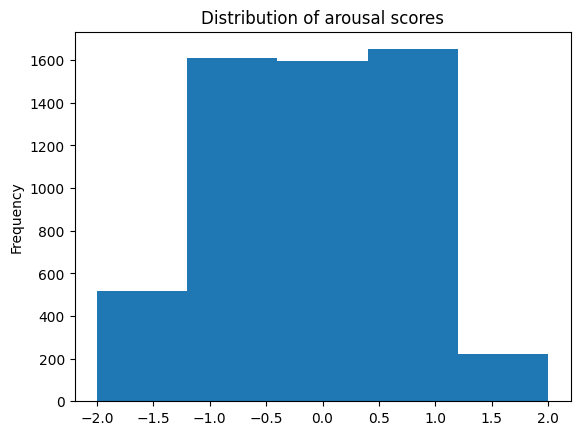

In [ ]:
_= rawData["circumplex.arousal"].plot.hist(bins=5, title="Distribution of arousal scores")

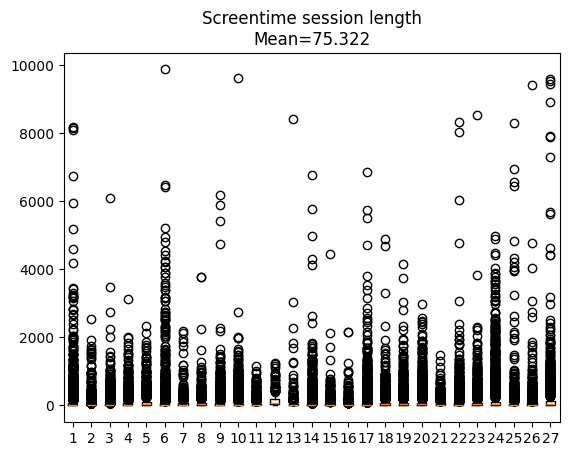

In [ ]:
fig, ax0 = plt.subplots()
uIds = [user for user in users]

stat = "screen"
_ = ax0.boxplot([rawData.loc[user][stat].loc[rawData.loc[user][stat].notna()] for user in users])
_= ax0.set_title(f"Screentime session length\nMean={rawData[stat].mean():.3f}")

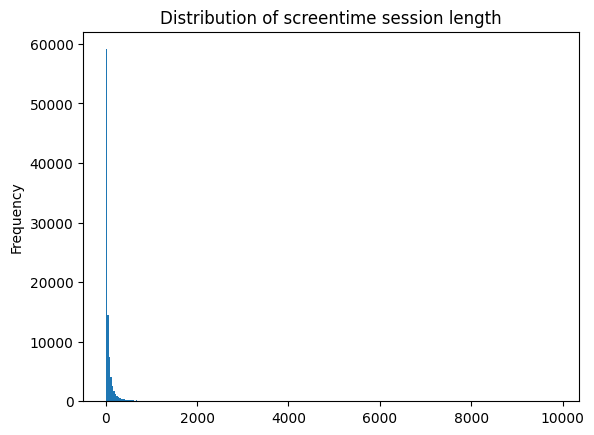

In [ ]:
_= rawData["screen"].plot.hist(bins = 300, title="Distribution of screentime session length")

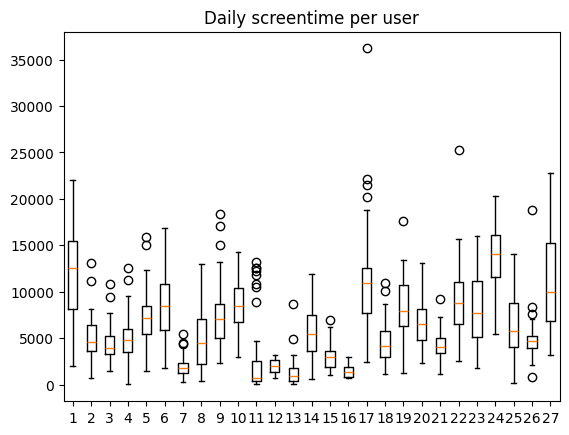

In [ ]:
fig, ax1 = plt.subplots()
uIds = [user for user in users]
_ = ax1.boxplot([prunedDaily.loc[user]["screen"] for user in users])
_= ax1.set_title("Daily screentime per user")

<Axes: title={'center': 'Daily screentime distribution'}, ylabel='Frequency'>

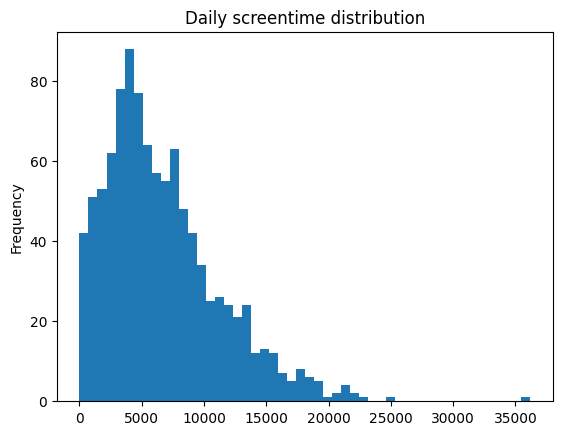

In [ ]:
prunedDaily["screen"].plot.hist(bins=50, title="Daily screentime distribution")

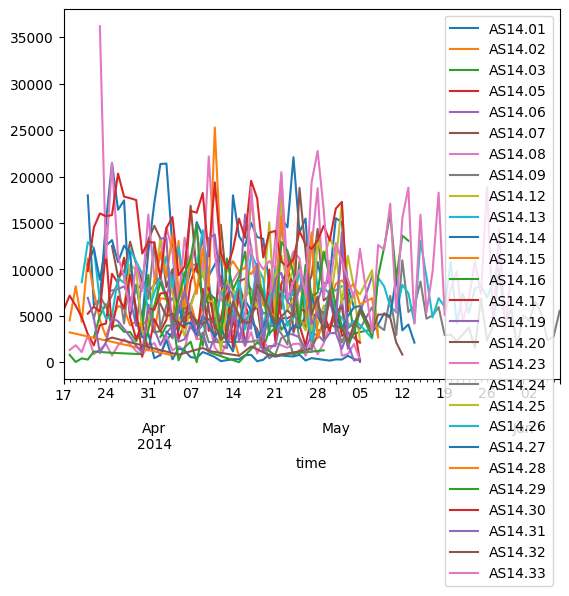

In [ ]:

fig, ax = plt.subplots()
for user in users:
    prunedDaily.loc[user].plot.line(y = "screen", ax=ax, label=user)

<Axes: ylabel='Frequency'>

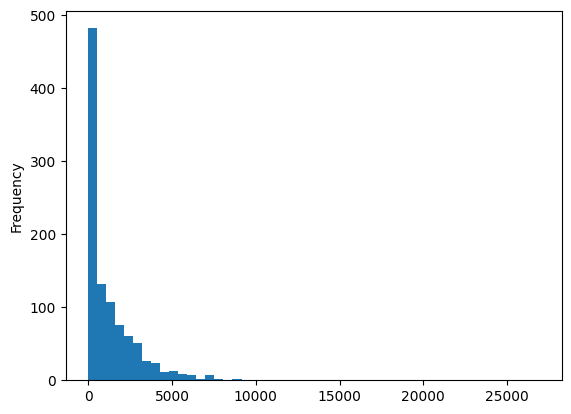

In [ ]:
prunedDaily["appCat.social"].plot.hist(bins=50)